In [1]:
# the following magic command is necessary to be in an interactive mode (with ability to rotate axes)
%matplotlib notebook
# uncomment the following line to draw static figures without interactive mode (works much faster)
#%matplotlib inline

import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Bad key "text.latex.preabmle" on line 4 in
/home/igudav/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/custom-rustex.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Drawing of isosurfaces

<IPython.core.display.Javascript object>


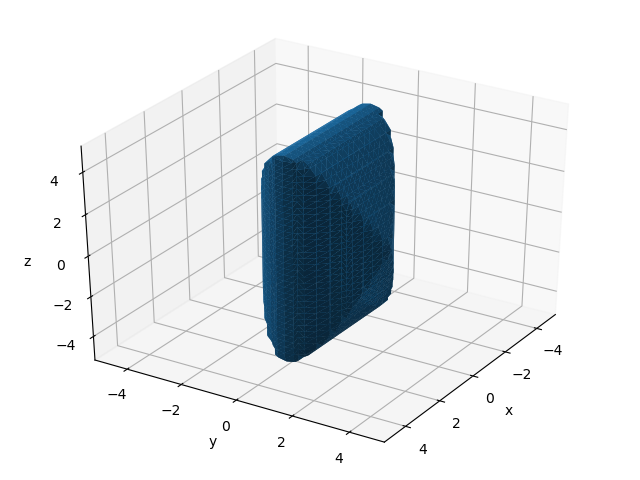

In [6]:
# Below you can add your own functions (or modify existing ones) and adjust parameters of plotting

# examples of functions for which isosurfaces are to be drawn

def func1(x, y, z):
    return np.maximum((x+1)**2/4+y**2+z**2-1,(x-1)**2/4+y**2+z**2-1)

def func2(x, y, z):
    return np.maximum(x**2/9+y**2/4+z**2-1,np.abs(y) - 1)

def func3(x, y, z):
    return np.maximum(x**2+y**2+z**2-2,np.maximum(np.abs(x)-1,np.maximum(np.abs(y)-1,np.abs(z)-1)))

def func4(x, y, z):
    return np.maximum(2 * np.abs(x), np.abs(z)) + y ** 2 - 5

# parameters of grid, function to plot and isosurface level
x_grid = (-6, 6, 40) # (x_min, x_max, n_steps)
y_grid = (-6, 6, 40) # (y_min, y_max, n_steps)
z_grid = (-6, 6, 40) # (z_min, z_max, n_steps)
func_to_plot = func4 # function to plot
level = 0. # level for isosurface



## The following code is not supposed to be changed (all configuration parameters are above)

# construction of isosurface
x, y, z = np.mgrid[x_grid[0]:x_grid[1]:(x_grid[2] + 1) * 1j, 
                   y_grid[0]:y_grid[1]:(y_grid[2] + 1) * 1j,
                   z_grid[0]:z_grid[1]:(z_grid[2] + 1) * 1j]
vol = func_to_plot(x, y, z)
verts, faces = measure.marching_cubes_classic(
    vol, level, spacing=(
        (x_grid[1] - x_grid[0]) / x_grid[2],
        (y_grid[1] - y_grid[0]) / y_grid[2],
        (z_grid[1] - z_grid[0]) / z_grid[2]))
verts[:, 0] = verts[:, 0] + x_grid[0]
verts[:, 1] = verts[:, 1] + y_grid[0]
verts[:, 2] = verts[:, 2] + z_grid[0]

# create figure and plot isosurface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2])

# place center of isosurface in the center of axes,
# make spans of axes limits (i.e. differences between maximal and minimal values)
# equal for x-, y- and z-axis (to preserve natural aspect ratio)
x_center = np.mean(verts[:, 0])
y_center = np.mean(verts[:, 1])
z_center = np.mean(verts[:, 2])
x_span = np.max(np.abs(verts[:, 0] - x_center))
y_span = np.max(np.abs(verts[:, 1] - y_center))
z_span = np.max(np.abs(verts[:, 2] - z_center))
max_span = max(x_span, y_span, z_span)
ax.set_xlim(x_center - max_span, x_center + max_span)
ax.set_ylim(y_center - max_span, y_center + max_span)
ax.set_zlim(z_center - max_span, z_center + max_span)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# show figure
plt.tight_layout()
plt.show()


# Drawing of trajectories

## Transforming representation of trajectories from SymPy to NumPy

In [5]:
from sympy import *

n_grid_steps = 100

t = Symbol('t', real=True)

x_traj_t_greater_pi = Matrix([[-t + sin(t) + 2*pi], [cos(t) - 1], [-t + 2*pi]])
x_traj_t_less_pi = Matrix([[t + 3*sin(t)], [3*cos(t) + 1], [t]])

print(x_traj_t_greater_pi)
print(x_traj_t_less_pi)

# function returning symbolic formulas for each t
def x(t_num): # it is important that t_num is a number, not simply some expression
    # u(tau) = -1 for tau in [0,pi], 1 for tau in (0,2*pi]
    if pi < t_num:
        return x_traj_t_greater_pi.subs(t, t_num)
    elif t_num <= pi:
        return x_traj_t_less_pi.subs(t, t_num)
    
t_grid_sym = np.mgrid[0:2*pi:(n_grid_steps + 1) * 1j] # this grid is symblic, please note pi (not np.pi)

# transform t_grid_sym (SymPy object) to NumPy array t_grid
t_grid = np.array(t_grid_sym).astype(np.float64)
# calculate x for each t from t_grid_sym (SymPy object) and transform it to a NumPy vector,
# then concatenate these vector into a matrix, each row determines the corresponding coordinate
x_traj = np.concatenate([np.array(x(t_num)).astype(np.float64) for t_num in list(t_grid_sym)], axis=1)

Matrix([[-t + sin(t) + 2*pi], [cos(t) - 1], [-t + 2*pi]])
Matrix([[t + 3*sin(t)], [3*cos(t) + 1], [t]])


## Drawing trajectories as functions of time

<IPython.core.display.Javascript object>


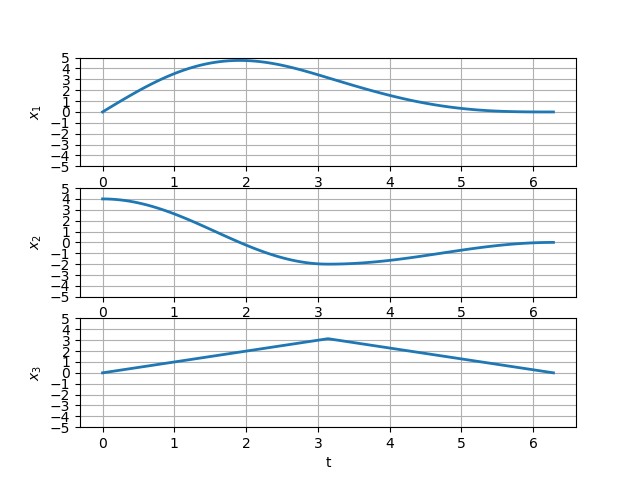

In [5]:
max_dev = np.ceil(np.max(np.abs(x_traj)))

fig = plt.figure()

ax1 = plt.subplot(3, 1, 1)
ax1.plot(t_grid, x_traj[0], '-', lw=2)
ax1.set_xlabel('t')
ax1.set_ylabel('$x_1$')
ax1.set_ylim(-max_dev, max_dev)
ax1.set_yticks(np.arange(-max_dev, max_dev+1, 1.0))
ax1.grid(True)

ax2 = plt.subplot(3, 1, 2)
ax2.plot(t_grid, x_traj[1], '-', lw=2)
ax2.set_xlabel('t')
ax2.set_ylabel('$x_2$')
ax2.set_ylim(-max_dev, max_dev)
ax2.set_yticks(np.arange(-max_dev, max_dev+1, 1.0))
ax2.grid(True)

ax3 = plt.subplot(3, 1, 3)
ax3.plot(t_grid, x_traj[2], '-', lw=2)
ax3.set_xlabel('t')
ax3.set_ylabel('$x_3$')
ax3.set_ylim(-max_dev, max_dev)
ax3.set_yticks(np.arange(-max_dev, max_dev+1, 1.0))
ax3.grid(True)

plt.show()


## Drawing of integral trajectories

Recall:

$$
\left\{\begin{array}{l}
x_1 = r - r^1,\\
x_2 = \dot r - 0,\\
x_3 = \chi - \chi^1.
\end{array}\right.
$$

Here 
$$
\nu = MG,\quad \chi=\dot\varphi\cdot r^2,\quad \chi^1=\sqrt{\nu\cdot r^1}.
$$

Hence if $\varphi(2\pi)=\varphi^1,$ then 

$$
\left\{\begin{array}{l}
r(t) = x_1(t) + r^1,\\
\varphi(t)=\varphi^1-\displaystyle\int\limits_t^{2\pi}\displaystyle\frac{x_3(s)+\chi^1}{r^2(s)}ds.
\end{array}\right.
$$

In [6]:
from scipy.integrate import quad

# Numbers as SymPy objects
r1 = Rational(10)
chi1 = Rational(150)
phi1 = Rational(0)

def r(t_num):
    return x(t_num)[0] + r1

# precalculate int from pi to 2*pi
integrand = (x_traj_t_greater_pi[2] + chi1) / (x_traj_t_greater_pi[0] + r1) ** 2
int_pi_2pi = quad(lambda s: np.float64(integrand.subs(t, s)), np.pi, 2*np.pi)[0]

def phi(t_num: np.float64):
    # please note that we do numerical integration (through quad), not a symbolic one
    # this is done to increase computational speed
    integrand = (x_traj_t_greater_pi[2] + chi1) / (x_traj_t_greater_pi[0] + r1) ** 2
    if np.pi < t_num:
        const_term = 0.
        up_int_limit = 2*np.pi
    else:
        const_term = int_pi_2pi
        integrand = ((x_traj_t_less_pi[2] + chi1) / (x_traj_t_less_pi[0] + r1) ** 2)
        up_int_limit = np.pi
    return np.float64(phi1) - (quad(lambda s: np.float64(integrand.subs(t, s)), t_num, up_int_limit)[0] + const_term)

# now r returns symbolic numbers, so that its values are transformed first to a list of float numbers,
# then this list is converted to a NumPy array
r_traj = np.array([np.float64(r(t_num)) for t_num in list(t_grid_sym)])
# now phi is initially returns float numbers due to numerical integration, so no conversion is to be done
phi_traj = np.array([phi(t_num) for t_num in list(t_grid)])

<IPython.core.display.Javascript object>


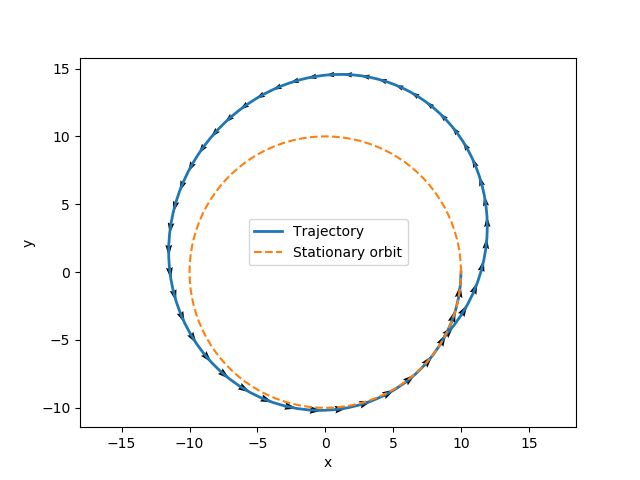

In [7]:
x_vec = r_traj * np.cos(phi_traj)
y_vec = r_traj * np.sin(phi_traj)
x_stat_vec = r1 * np.cos(t_grid)
y_stat_vec = r1 * np.sin(t_grid)
x_quiver_start_vec = x_vec[:-1]
y_quiver_start_vec = y_vec[:-1]
x_quiver_dir_vec = x_vec[1:] - x_vec[:-1]
y_quiver_dir_vec = y_vec[1:] - y_vec[:-1]

fig = plt.figure()
ax = plt.axes()

ax.plot(x_vec, y_vec, '-', lw=2, label='Trajectory')
ax.quiver(x_quiver_start_vec[::2], y_quiver_start_vec[::2],
          x_quiver_dir_vec[::2], y_quiver_dir_vec[::2], scale_units='xy', angles='xy', scale=1) 
ax.plot(x_stat_vec, y_stat_vec, '--', label='Stationary orbit')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.axis('equal')
plt.legend(loc='best')
plt.show()